In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import nltk
import string
import re
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("twittersentiment.csv")

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
def remove_pattern(txt,pattern):
    r=re.findall(pattern,txt)
    for word in r:
        txt=re.sub(word,"",txt)
    return txt

In [6]:
df["clean_tweet"]=np.vectorize(remove_pattern)(df["tweet"],"@[\w]*")

In [7]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
df["clean_tweet"]=df["clean_tweet"].str.replace("[^a-zA-Z#]"," ")

In [9]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [10]:
#removing short words <4
df["clean_tweet"]=df["clean_tweet"].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

In [11]:
df

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,nina turner airwaves trying wrap herself mantl...
31959,31960,0,listening to sad songs on a monday morning otw...,listening songs monday morning work
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #temple vandalised #calgary #wso condemns


In [12]:
tokenizedtweet=df["clean_tweet"].apply(lambda x : x.split())
tokenizedtweet

0        [when, father, dysfunctional, selfish, drags, ...
1        [thanks, #lyft, credit, cause, they, offer, wh...
2                                  [bihday, your, majesty]
3                         [#model, love, take, with, time]
4                       [factsguide, society, #motivation]
                               ...                        
31957                                        [that, youuu]
31958    [nina, turner, airwaves, trying, wrap, herself...
31959            [listening, songs, monday, morning, work]
31960    [#sikh, #temple, vandalised, #calgary, #wso, c...
31961                                      [thank, follow]
Name: clean_tweet, Length: 31962, dtype: object

In [13]:
from nltk.stem.porter import PorterStemmer
stemmer= PorterStemmer()
tokenizedtweet=tokenizedtweet.apply(lambda x : [stemmer.stem(word) for word in x])
tokenizedtweet

0        [when, father, dysfunct, selfish, drag, kid, i...
1        [thank, #lyft, credit, caus, they, offer, whee...
2                                  [bihday, your, majesti]
3                         [#model, love, take, with, time]
4                             [factsguid, societi, #motiv]
                               ...                        
31957                                        [that, youuu]
31958    [nina, turner, airwav, tri, wrap, herself, man...
31959                   [listen, song, monday, morn, work]
31960    [#sikh, #templ, vandalis, #calgari, #wso, cond...
31961                                      [thank, follow]
Name: clean_tweet, Length: 31962, dtype: object

In [14]:
tokenizedtweet=tokenizedtweet.apply(lambda x : " ".join([i for i in x]))
tokenizedtweet

0        when father dysfunct selfish drag kid into dys...
1        thank #lyft credit caus they offer wheelchair ...
2                                      bihday your majesti
3                               #model love take with time
4                                 factsguid societi #motiv
                               ...                        
31957                                           that youuu
31958    nina turner airwav tri wrap herself mantl genu...
31959                         listen song monday morn work
31960          #sikh #templ vandalis #calgari #wso condemn
31961                                         thank follow
Name: clean_tweet, Length: 31962, dtype: object

In [15]:
df["clean_tweet"]=tokenizedtweet
df

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,nina turner airwav tri wrap herself mantl genu...
31959,31960,0,listening to sad songs on a monday morning otw...,listen song monday morn work
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #templ vandalis #calgari #wso condemn


In [16]:
all_words=" ".join([i for i in df["clean_tweet"]])
all_words

'when father dysfunct selfish drag kid into dysfunct #run thank #lyft credit caus they offer wheelchair van #disapoint #getthank bihday your majesti #model love take with time factsguid societi #motiv huge fare talk befor they leav chao disput when they there #allshowandnogo camp tomorrow danni next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl love land #allin #cav #champion #cleveland #clevelandcavali welcom here #ireland consum price index climb from previou #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love daddi today day #gettingf #cnn call #michigan middl school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin ouch junior angri #got #junior #yugyoem #omg thank have paner #thank #posit retweet agre #friday smile around user #cooki make peopl know essenti oil made chemic #euro peopl 

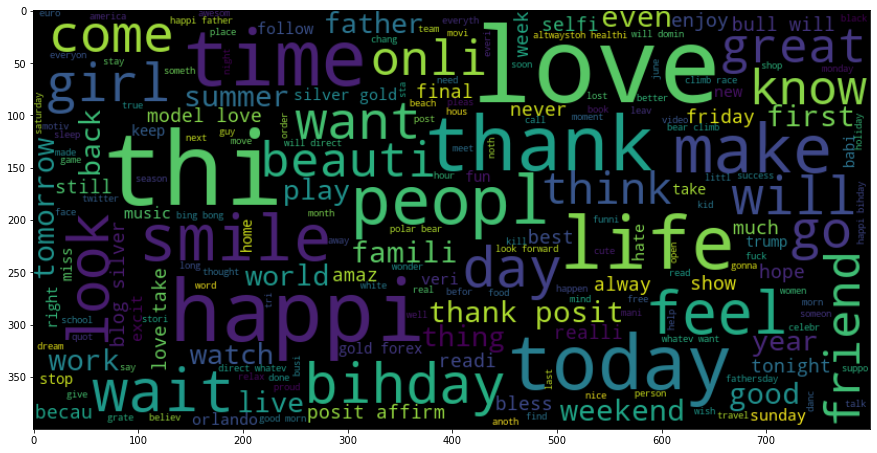

In [17]:
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=400,margin=2,random_state=42,max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.show()

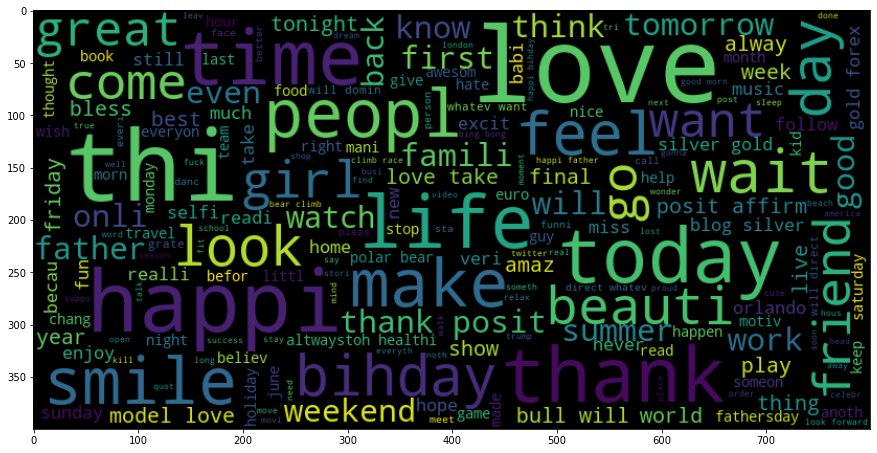

In [18]:
all_words=" ".join([i for i in df["clean_tweet"][df["label"]==0]])
wordcloud=WordCloud(width=800,height=400,margin=2,random_state=42,max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.show()

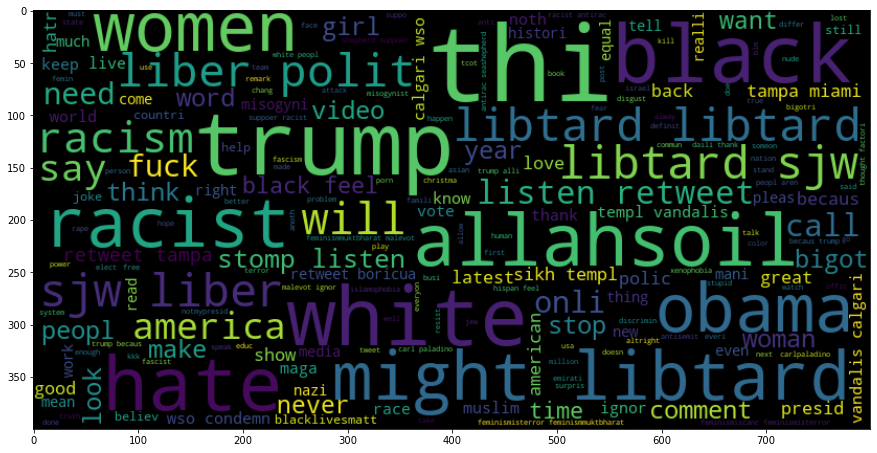

In [19]:
all_words=" ".join([i for i in df["clean_tweet"][df["label"]==1]])
wordcloud=WordCloud(width=800,height=400,margin=2,random_state=42,max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.show()

In [20]:
#hashtag extraction
def hashtag_extract(tweets):
    hashtags=[]
    for tweet in tweets:
        ht=re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags

In [21]:
ht_positive=hashtag_extract(df["clean_tweet"][df["label"]==0])
ht_negative=hashtag_extract(df["clean_tweet"][df["label"]==1])

In [22]:
ht_positive[0:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [23]:
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])

In [24]:
ht_positive[0:10]

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate']

In [25]:
f=nltk.FreqDist(ht_positive)
f

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

In [26]:
d=pd.DataFrame({"Hahtag":list(f.keys()),"Frequency":list(f.values())})

In [27]:
d.head()

,Hahtag,Frequency
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


In [28]:
d=d.nlargest(columns="Frequency",n=10)
d

,Hahtag,Frequency
32,love,1654
39,posit,917
58,smile,676
157,healthi,573
38,thank,534
176,fun,463
343,life,425
92,affirm,423
286,summer,390
4,model,375


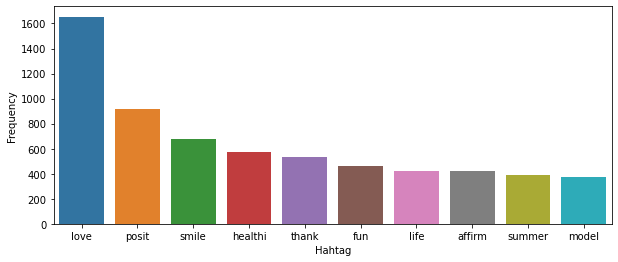

In [29]:
plt.figure(figsize=(10,4))
sns.barplot(data=d,x="Hahtag",y="Frequency")
plt.show()

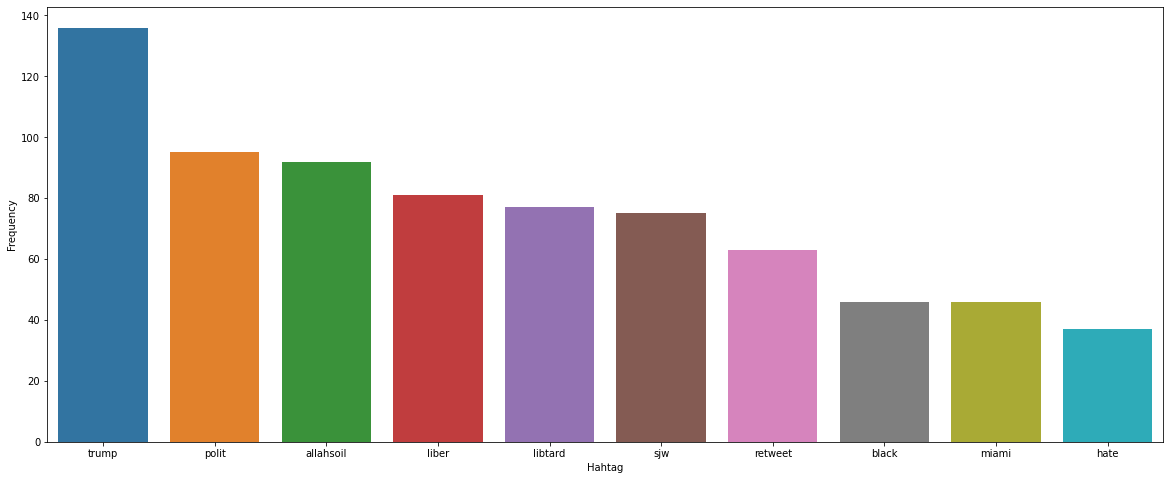

In [30]:
f=nltk.FreqDist(ht_negative)
d=pd.DataFrame({"Hahtag":list(f.keys()),"Frequency":list(f.values())})
d=d.nlargest(columns="Frequency",n=10)
plt.figure(figsize=(20,8))
sns.barplot(data=d,x="Hahtag",y="Frequency")
plt.show()

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words="english")
bow=bow_vectorizer.fit_transform(df["clean_tweet"])

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bow,df["label"],random_state=42,test_size=0.25)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score
le=LogisticRegression()

In [34]:
le.fit(x_train,y_train)

LogisticRegression()

In [35]:
pred=le.predict(x_test)

In [36]:
f1_score(y_test,pred)

0.49763033175355453

In [37]:
accuracy_score(y_test,pred)

0.9469403078463271